<a href="https://colab.research.google.com/github/ZandomeneghiChiara/MentalHealth_SR/blob/main/MentalHealth_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mental health encompasses our emotional, psychological, and social well-being, influencing our thoughts,
feelings, actions, stress management, relationships, and decision-making throughout life.

 Mental health is vital for overall well-being, as it impacts physical health and vice versa.
 Depression, for instance, heightens the risk of chronic physical ailments like diabetes and heart disease, while enduring physical conditions can raise the likelihood of mental health issues.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# 1 - Chosen datasets

In [2]:
# Reading datasets on mental health
data1 = pd.read_csv("1_Mental_IllnessesPrevalence.csv")
data2 = pd.read_csv("4_AdultPop_Mental_Illnesses.csv")
data3 = pd.read_csv("6_DepressiveSymptoms_Pop.csv")
data4 = pd.read_csv("7_Countries_MI_GlobalBurdenDisease.csv")

In [3]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

# 2 - Description of All Datasets

In [4]:
def describe(df):
    # Initialize lists to store information
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []

    # Iterate through each column in the DataFrame
    for column in df.columns:
        variables.append(column)
        dtypes.append(df[column].dtype)
        count.append(len(df[column]))
        unique.append(len(df[column].unique()))
        missing.append(df[column].isna().sum())

    # Create a DataFrame to store the summary statistics
    summary_df = pd.DataFrame({
        'Variable': variables,
        'Data Type': dtypes,
        'Count': count,
        'Unique Values': unique,
        'Missing Values': missing
    })

    return summary_df

In [5]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 3 - Output of Describes

In [6]:
def print_describe_table(header, dataframe):
    print(color.BOLD + color.BLUE + color.UNDERLINE + f'"{header}"' + color.END)
    print(describe(dataframe))
    print("\n")

print_describe_table("Mental illness dataframe", df1)
print_describe_table("Adult population, mental illnesses", df2)
print_describe_table("Depressive", df3)
print_describe_table("Number of countries", df4)

"Mental illness dataframe"
                                            Variable Data Type  Count  \
0                                             Entity    object   6420   
1                                               Code    object   6420   
2                                               Year     int64   6420   
3  Schizophrenia disorders (share of population) ...   float64   6420   
4  Depressive disorders (share of population) - S...   float64   6420   
5  Anxiety disorders (share of population) - Sex:...   float64   6420   
6  Bipolar disorders (share of population) - Sex:...   float64   6420   
7  Eating disorders (share of population) - Sex: ...   float64   6420   

   Unique Values  Missing Values  
0            214               0  
1            206             270  
2             30               0  
3           6406               0  
4           6416               0  
5           6417               0  
6           6385               0  
7           6417               0  


# 4 - df1 - Mental Illnesses Prevalence

## 4.1 - EDA

In [7]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [8]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [9]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

df1_variables

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...
6415,0.201042,3.407624,3.184012,0.538596,0.095652
6416,0.201319,3.410755,3.187148,0.538593,0.096662
6417,0.201639,3.411965,3.188418,0.538589,0.097330
6418,0.201976,3.406929,3.172111,0.538585,0.097909


## 4.2 - Some plots

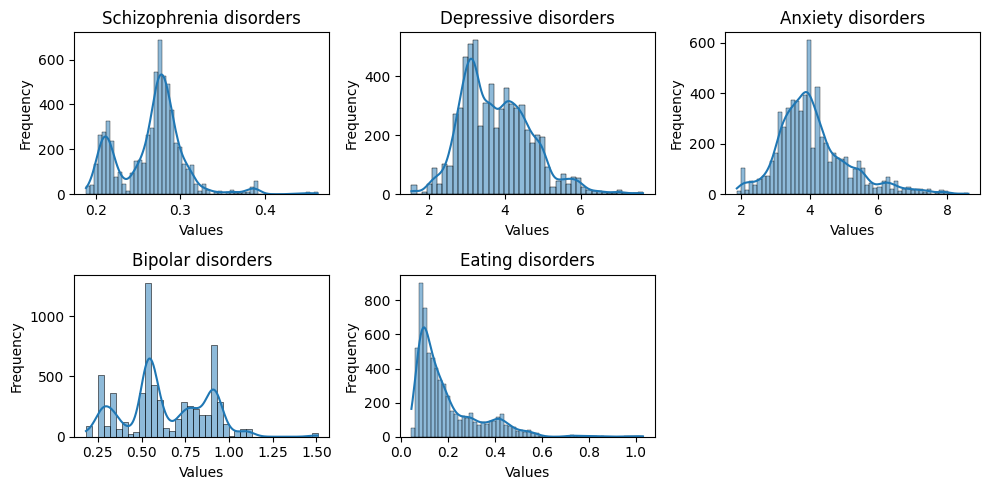

In [10]:
# Histograms
plt.figure(figsize=(10, 5))

# Define subplot grid
grid_size = (2, 3)

# Plot histograms
for i, disorder in enumerate(df1_variables.columns):
    plt.subplot2grid(grid_size, divmod(i, grid_size[1]))
    sns.histplot(df1_variables[disorder], kde=True)
    plt.title(disorder)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

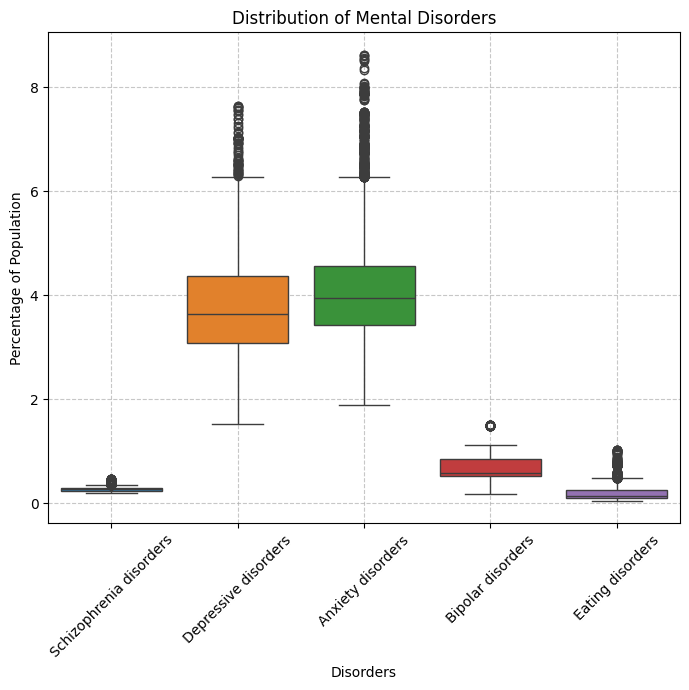

In [11]:
# Boxplots
plt.figure(figsize=(7, 7))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Set color palette for better differentiation

# Plot boxplot
sns.boxplot(data=df1_variables, palette=colors)

# Add title and axis labels
plt.title("Distribution of Mental Disorders")
plt.ylabel("Percentage of Population")
plt.xlabel("Disorders")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

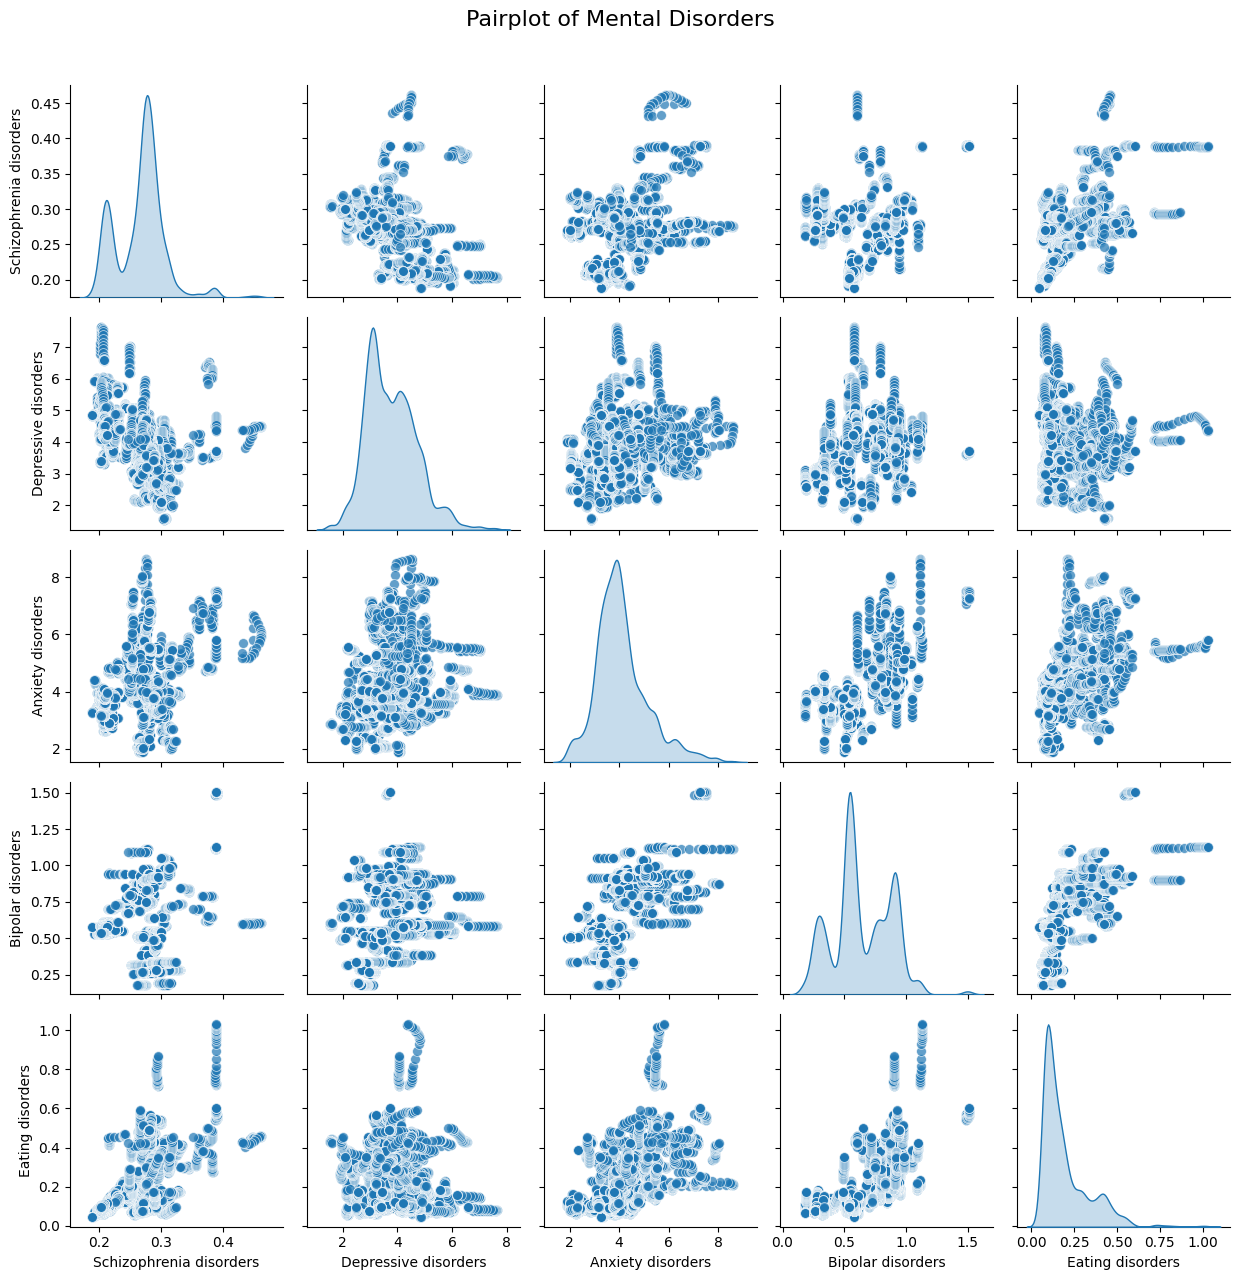

In [12]:
# Scatterplot matrix
plt.figure(figsize=(5, 5))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]    # Define custom color palette

# Plot pairplot with custom settings
sns.pairplot(df1_variables, diag_kind='kde', palette=colors, markers='o', plot_kws={'alpha':0.7, 's': 50})

plt.suptitle("Pairplot of Mental Disorders", y=1.02, fontsize=16)

plt.tight_layout()

plt.show()

## 4.3 -  Correlation

In [13]:
# Calculate the correlation matrix
Corrmat = df1_variables.corr()

# Display the correlation matrix as a table
Corrmat.style.format(precision=2)

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
Schizophrenia disorders,1.00,-0.47,0.30,0.12,0.50
Depressive disorders,-0.47,1.00,0.11,0.15,-0.05
Anxiety disorders,0.30,0.11,1.00,0.58,0.59
Bipolar disorders,0.12,0.15,0.58,1.00,0.68
Eating disorders,0.50,-0.05,0.59,0.68,1.00


<Axes: >

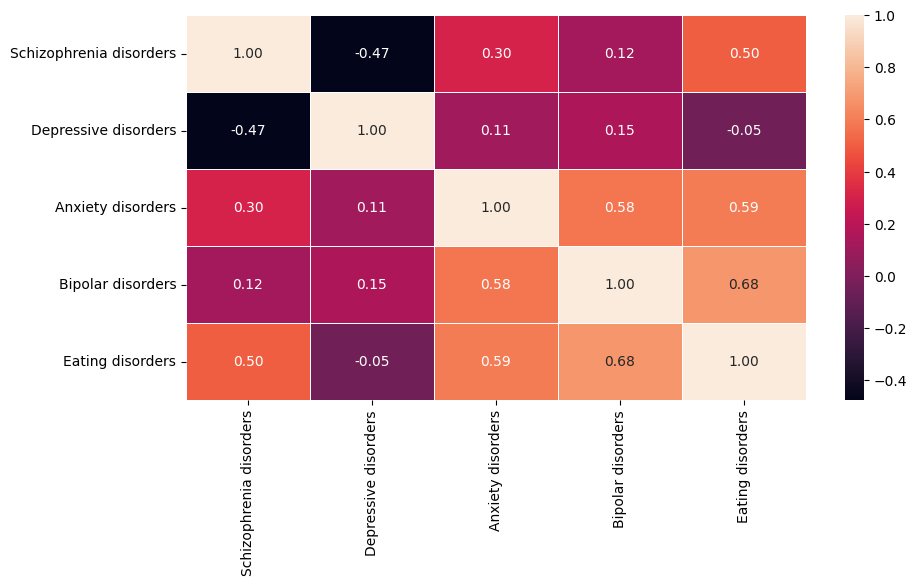

In [14]:
Corrmat = df1_variables.corr()
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

This correlation table presents the relationships between different psychological disorders. Notably, it indicates moderate to strong correlations between certain disorders, such as schizophrenia and both anxiety and eating disorders, as well as strong correlations between bipolar and eating disorders, and anxiety and bipolar disorders. Conversely, depressive disorders show weaker correlations with other disorders in this context. These insights can help in understanding potential comorbidities and inform treatment approaches.

# 5 - df2 - Adult Population covered in primary data on the Prevalence of Mental Illnesses

## 5.1 - EDA

In [15]:
df2_column_names = list(df2.columns.values)
df2_column_names

['Entity',
 'Code',
 'Year',
 'Major depression',
 'Bipolar disorder',
 'Eating disorders',
 'Dysthymia',
 'Schizophrenia',
 'Anxiety disorders']

In [16]:
df2 = df2.rename(columns={'Major depression': 'Major depression disorders',
                          'Bipolar disorder': 'Bipolar disorders',
                          'Eating disorders':'Eating disorders disorders',
                          'Dysthymia' : 'Dysthymia disorders',
                          'Schizophrenia': 'Schizophrenia disorders',
                          'Anxiety disorders' : 'Anxiety disorders'})
df2

,Entity,Code,Year,Major depression disorders,Bipolar disorders,Eating disorders disorders,Dysthymia disorders,Schizophrenia disorders,Anxiety disorders
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,NaN,2008,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
5,Central Europe,NaN,2008,16.0,0.0,18.8,0.0,0,25.5
6,Central Latin America,NaN,2008,49.8,34.5,71.0,46.0,0.7,69.7
7,Central Sub-Saharan Africa,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
8,East Asia,NaN,2008,12.2,8.4,7.9,8.3,15.6,2.5
9,East Sub-Saharan Africa,NaN,2008,1.3,0.9,0.1,0.7,6.4,0.4


In [17]:
df2

,Entity,Code,Year,Major depression disorders,Bipolar disorders,Eating disorders disorders,Dysthymia disorders,Schizophrenia disorders,Anxiety disorders
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,NaN,2008,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
5,Central Europe,NaN,2008,16.0,0.0,18.8,0.0,0,25.5
6,Central Latin America,NaN,2008,49.8,34.5,71.0,46.0,0.7,69.7
7,Central Sub-Saharan Africa,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
8,East Asia,NaN,2008,12.2,8.4,7.9,8.3,15.6,2.5
9,East Sub-Saharan Africa,NaN,2008,1.3,0.9,0.1,0.7,6.4,0.4


In [18]:
df2_variables = df2[["Entity", "Major depression disorders", "Bipolar disorders", "Eating disorders disorders",
                     "Dysthymia disorders", "Schizophrenia disorders", "Anxiety disorders"]]

df2_variables

,Entity,Major depression disorders,Bipolar disorders,Eating disorders disorders,Dysthymia disorders,Schizophrenia disorders,Anxiety disorders
0,Andean Latin America,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,0.0,0.0,0.0,0.0,0,0.0
5,Central Europe,16.0,0.0,18.8,0.0,0,25.5
6,Central Latin America,49.8,34.5,71.0,46.0,0.7,69.7
7,Central Sub-Saharan Africa,0.0,0.0,0.0,0.0,0,0.0
8,East Asia,12.2,8.4,7.9,8.3,15.6,2.5
9,East Sub-Saharan Africa,1.3,0.9,0.1,0.7,6.4,0.4


## 5.2 - Some plots

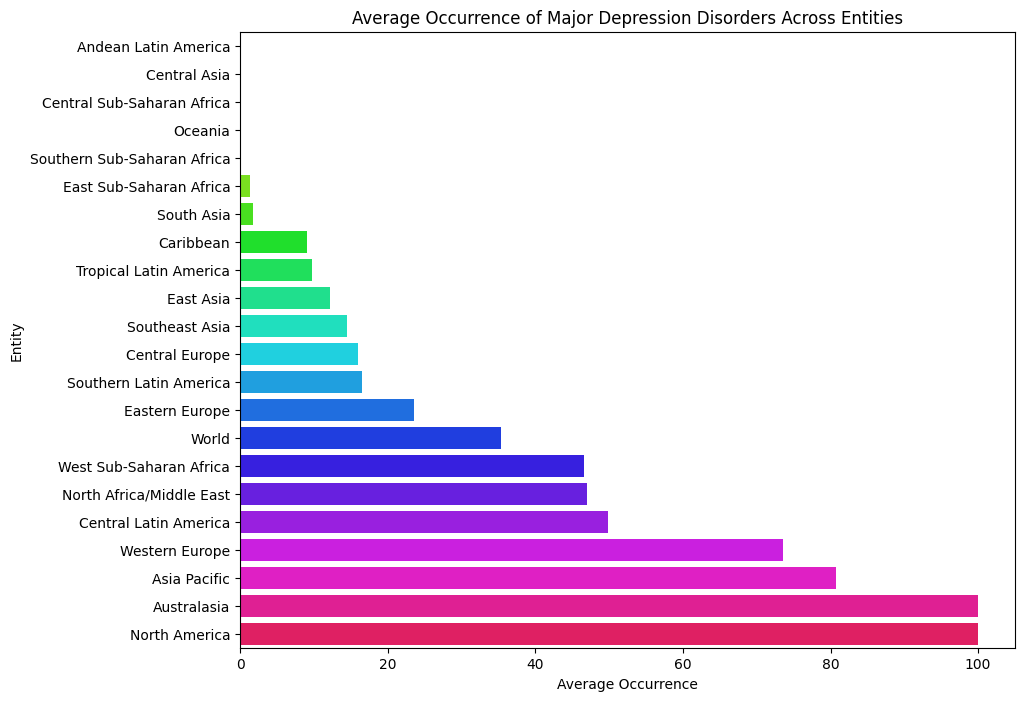

In [30]:
# Set the color palette
colors = sns.color_palette('hsv', len(df2_variables['Entity'].unique()))  # Using 'hsv' palette for distinct colors

# Create the figure and axes
plt.figure(figsize=(10, 8))  # Adjusted figsize for horizontal plot
bars = sns.barplot(data=df2_variables, y='Entity', x='Major depression disorders', palette=colors)

# Set titles and labels
plt.title("Average Occurrence of Major Depression Disorders Across Entities")
plt.xlabel("Average Occurrence")
plt.ylabel("Entity")

# Show the plot
plt.show()

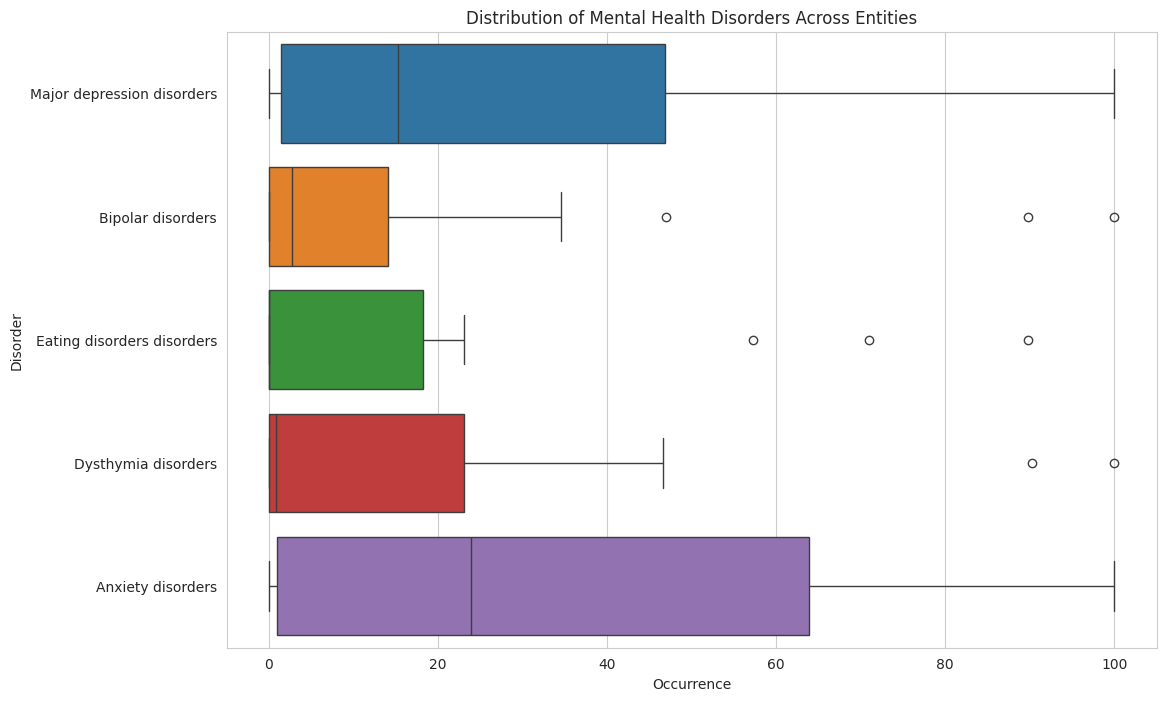

In [35]:
# Box Plot showing the distribution of each disorder across different entities
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2_variables.drop(columns='Entity'), orient='h')
plt.title("Distribution of Mental Health Disorders Across Entities")
plt.xlabel("Occurrence")
plt.ylabel("Disorder")
plt.show()

## 5.3 - Correlation